## <center> CS110 Assignment 2: Counting Bloom Filter </center>

<center> Michael H. Chen </center>
<center> Prof. Drummond </center>
<center> CS110 Spring 2019 </center>

### Task 1: 
*Give an overview of the types of operations that a CBF supports, and give a few example applications that can benefit from using CBFs.*

The Bloom filter is a type of data structure that is used to test whether an element is part of a set (Wikipedia, n.d.). Although it is space-efficient compared to conventional error-free hash tables, it can produce false-positives — when the algorithm tells you that an element exists when it doesn't. Fortunately, it will never have false-negatives. This has to do with its implementation. When building the Bloom filter, the to-be-inserted elements will be plugged into several hash functions, each of them outputting an index value. At the index locations in the Bloom filter array, the default "False" value will be replaced with "True" (if the value is already "True", then do nothing). As more elements are inserted into the Bloom filter, the more likely that the outputted index will already be "True", which means multiple elements are "occupying" the index. The end product is a list of "True" and "False" values. To test whether an element is part of the set, we will apply the same hash functions to the element. If the values at the indices are all "True", then the element is possibly in the set. If there's a "False" value, then the element is definitely not in the set. One can control the false-positive rate by adjusting the hash functions, the number of hash functions, and the size of the Bloom filter. Overall, Bloom filter is a really space-efficient data structure.

A problem with the traditional Bloom filter is that while it allows for easy insertion, it does not support deletion. Simply replacing "True" by "False" at the indices of the to-be-deleted element is problematic, because as said above, multiple elements can share the same index. Doing so will introduce false-negatives, cases where the element is in the set but the Bloom filter tells us it is not. The counting Bloom filter is created to address exactly this issue: it supports the delete operation. 

The counting Bloom filter utilizes an array that contains numbers instead of boolean (T/F) values. By default, it starts with all 0s in the array. Then, as we insert the elements, the corresponding indices will increment (+1) accoringly. The finish product will have counters of how many times each indices is outputted by the hash functions. For example, an index with the value of 4 indicates that 4 hash functions yielded that index value. With the counter, we can confidently delete an element from the set. By decrementing the value (-1) at its corresponding indices, we are still properly keeping track of whether the index is populated or not. When the deleted element is the only one populating the index, deletion will decrement the index value to 0. When the deleted element is not the only one, deletion will decrement the index value but it will still be bigger than 0. Hence, we can still test whether an element is part of the set without any false-negatives. 

Counting Bloom filter can be applied in various context to boost performance. One, URL shortener. When creating a shortened URL, two identicals URLs will be problematic. To ensure that identical URLs are never used, it can use counting Bloom filter to evaluate whether the URL is in the set of existing URLs. When URLs are changed, the random generator can delete that element from the set so it can be used later. Two, music/article/video suggestions. If platforms (e.g. YouTube, Spotify, New York Times) wants to optimize its recommendation to its readers, they might consider using Bloom filter to keep track of all the content that has been seen. When it wishes to suggest a new content, it will evaluate whether it's in the set using Bloom filter so it doesn't suggest repeated content. However, there are still cases when they might want to delete something from the Bloom filter (say the user expresses interest in the artist/genre). This is when counting Bloom filter will come in handy. 

### Task 2: 
*Implement your own CBF data structure and required hash functions using Python, justifying why you’ve chosen them.*

In [7]:
import string

class CountingBloomFilter(object):
    
    def __init__(self, size): 
        ''' 
        size: size of the bloom filter
        array: an array of with 0s with size 
        '''
        # Size of bloom filter
        self.size = size
  
        # Array of given size with 0's
        self.array = [0] * size
    
    def insert(self, item):
        
        '''
        Inserting an item into the array by incrementing the indices calculated by the hash functions
        '''
        #Getting a index out of each hash function
        index1 = self.hash1(item)%self.size
        index2 = self.hash2(item)%self.size
        index3 = self.hash3(item)%self.size
        
        #Incrementing the indices by 1 
        self.array[index1] += 1 
        self.array[index2] += 1 
        self.array[index3] += 1 
        
    def search(self, item):
        '''
        Searching for an item in the bloom filter by getting the indices from hash functions
        Only if all 3 indices are > 0 will the item is possibly in the list
        '''
        #Getting indices from hash functions
        index1 = self.hash1(item)%self.size
        index2 = self.hash2(item)%self.size
        index3 = self.hash3(item)%self.size
        
        #Checking whether the values at the indices are 0s - the case when item is not found
        if self.array[index1] == 0 or self.array[index2] == 0 or self.array[index3] == 0:
            return False
        
        #If the values are all larger than 0, then the item is possibly in the list
        else:
            return True
    
    def delete(self, item):
        '''
        Deleting an item into the array by decrementing the indices calculated by the hash functions
        '''
        #Getting a index out of each hash function
        index1 = self.hash1(item)%self.size
        index2 = self.hash2(item)%self.size
        index3 = self.hash3(item)%self.size
        
        #Decrementing the indices by 1 
        self.array[index1] -= 1 
        self.array[index2] -= 1 
        self.array[index3] -= 1 
    
    def hash1(self, item):
        ans = 0
        for chr in item:
            ans = ans * 128 + ord(chr)   
        return ans
        
    def hash2(self, item):
        ans = 0
        for chr in item:
            ans = ans + ord(chr)
        ans = ans + 7*ord(item[-1]) + 3*ord(item[-1])**2
        return ans
    
    def hash3(self, item):
        ans = 0
        for chr in item:
            ans = ans + ord(chr)

        h1 = ans%13
        h2 = ans%31*ord(item[-1])

        ans = h1 + h2
        return ans

**Hash Function Selection:**

I decided to have 3 hash functions, considering the tradeoff between false-positive rate and computational load. On one hand, using more hash functions to map a key into the Bloom filter will improve the accuracy because it is less likely for two different inputs to have identical sets of indices when the set is large. On the other hand, having more hash function puts more computational load onto the algorithm, making it less time-efficient. Three hash function is a pretty reasonable number, balancing the tradeoffs mentioned above. I have selected hash functions from Session 7.2 and 8.1, where we analyzed various hash functions. 

The 1st hash function is from Session 7.2, the one called "hash_str3". We discussed in class that this function gives the most number of unique outputs, indicating its ability to generate uniform distribution. It stores a cumulative value of itself multiplying by 128 and adding to the next letter's ASCII value.

The 2nd hash function is the one used in quadratic probing. I chose quadratic instead of linear because of its ability to prevent clustering and collisions. However, since Bloom filter does not utilize open addressing, we will use the ASCII value of the last letter as the i's to plug into the quadratic function. The constants are chosen as 7 and 3. First, it takes the sum of all the ASCII values, then it adds the quadratic function given by constants and the last letter's ASCII. 

The 3rd hash function is a double hash, which involves two independent hash functions. It is ideal because it can generate a large number of permutations. We will use the ASCII value of the last letter to substitute i. First, it takes the sum of all the ASCII values. Then, it takes the modula with 13 and 31 (two prime numbers). Finally, it adds the first modula with the second modula multiplied by the ASCII of the last letter. 

### Task 3: 
*3. Using your own Python implementation and generating data to push into the CBF, provide an analysis, both theoretical and experimental, of how your implementation scales in terms of:*

*a) memory size as a function of the false positive rate*

*b) memory size as a function of the number of items stored*

*c) access time as a function of the false positive rate*

*d) access time as a function of the number of items stored*

In [8]:
import random
import string

n = 100
m = 1000
cbf = CountingBloomFilter(m)

#Function that generates strings of size between 5 and 9
def randomword():
    return ''.join(random.choice(string.ascii_lowercase) for i in range(random.randint(5,10)))

#Generating n (100) random strings to be inserted into the counting bloom filter
word_list = []
for i in range(n):
    word_list.append(randomword())

for word in word_list:
    cbf.insert(word)

#Generating the test list with another n (100) random strings + strings generated above
test_list = []
for i in range(n):
    test_list.append(randomword())
test_list = test_list + word_list

#Using the test list to test for false-positive rate of bloom filter
false_positive = 0
true_negative = 0
for word in test_list:
    if cbf.search(word):
        if word not in word_list:
            print("'{}' is a false positive!".format(word))
            false_positive += 1
        else:
            print("'{}' is present!".format(word)) # means the word is THERE
    else:
        print("'{}' is definitely not present!".format(word)) 
        true_negative += 1

false_positive_rate = false_positive/(true_negative + false_positive)

print(false_positive_rate)



'wqozo' is definitely not present!
'ybsrc' is definitely not present!
'ftunqu' is definitely not present!
'qatteqqy' is definitely not present!
'pweui' is definitely not present!
'vorzqakngh' is definitely not present!
'autkhpvo' is definitely not present!
'xhhoktn' is definitely not present!
'qhwfe' is definitely not present!
'yefwmkvau' is definitely not present!
'uivwadol' is definitely not present!
'vqromgalrg' is definitely not present!
'nryxyqc' is definitely not present!
'sdcuc' is definitely not present!
'sxurmus' is definitely not present!
'nyupfhaue' is definitely not present!
'irwwzjagri' is definitely not present!
'doyltqjgf' is definitely not present!
'avjmlvmisj' is definitely not present!
'nuhodosud' is definitely not present!
'jgpzzyvro' is definitely not present!
'kqhuv' is definitely not present!
'kmrosxhsz' is definitely not present!
'jrovwtwecp' is definitely not present!
'nehruiibig' is definitely not present!
'pemlaoqzx' is definitely not present!
'oaiconbhje' is 

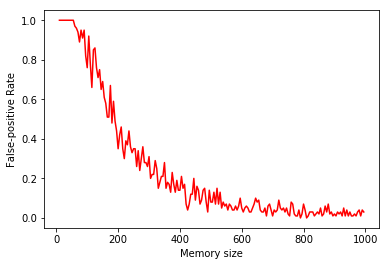

In [9]:
#Plotting memory size as a function of false-positive rate
import matplotlib.pyplot as plt

fp_rate = [] #Empty array that records false-positive rate
memory = [] #Empty array that records memory size
input_size = 100 #Fixing my input size as 100

for i in range(10,1000,5):
    
    memory.append(i)
    cbf = CountingBloomFilter(i)
    
    word_list = []
    for i in range(input_size):
        word_list.append(randomword())

    for word in word_list:
        cbf.insert(word)
    
    test_list = []
    for i in range(input_size):
        test_list.append(randomword())
        
    false_positive = 0
    true_negative = 0
    for word in test_list:
        if cbf.search(word):
            if word not in word_list:
                false_positive += 1
        else:
            true_negative += 1

    false_positive_rate = false_positive/(true_negative + false_positive)
    fp_rate.append(false_positive_rate)
    

plt.plot(memory, fp_rate, color = 'red') 
plt.xlabel("Memory size")
plt.ylabel("False-positive Rate")
plt.show()

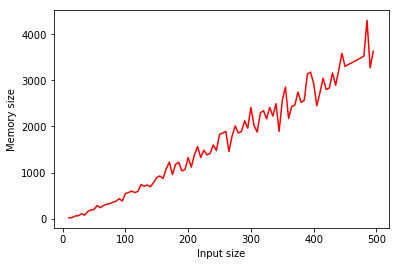

In [12]:
#Plotting memory size as a function of input size
import matplotlib.pyplot as plt

fp_rate = 0.05 #Fixing false-positive rate at 5%
memory_size = [] #Empty array that records memory size
input_size = [] #Empty array that records input size

for i in range(10,500,5):
    
    input_size.append(i) 
    false_positive_rate = 1
    memory = i
    
    while false_positive_rate > fp_rate:
        memory = int(memory*1.1)
        cbf = CountingBloomFilter(memory)

        
        old = []
        for _ in range(i):
            old.append(randomword())

        for j in old:
            cbf.insert(j)

        new = []
        for _ in range(i):
            new.append(randomword())

        false_pos = 0
        true_neg = 0
        for word in new:
            if cbf.search(word):
                if word not in old:
                    false_pos += 1
            else:
                true_neg += 1

        false_positive_rate = false_pos/(true_neg + false_pos)
    
    memory_size.append(memory)

plt.plot(input_size, memory_size, color = 'red') 
plt.xlabel("Input size")
plt.ylabel("Memory size")
plt.show()

### Task 4: 
*Produce a plot to show that your implementation’s false positive rate matches the theoretically expected rate.*

The cell below implements the counting Bloom filter and records how false-positive rate varies with memory size. The number of input is fixed at 100. The number of hash function is fixed at 3, as defined in the CountingBloomFilter class. This is the empirical result using simulated inputs. 

In [6]:
'''
Empirical result of how false-positive rate varies with memory size
'''
emp_fp_rate = [] #Empty array that records false-positive rate
memory_size = [] #Empty array that records memory size
input_size = 100 #Fixing my input size as 100

for i in range(10,1000,5):
    
    memory_size.append(i)
    cbf = CountingBloomFilter(i)
    
    word_list = []
    for i in range(input_size):
        word_list.append(randomword())

    for word in word_list:
        cbf.insert(word)
    
    test_list = []
    for i in range(input_size):
        test_list.append(randomword())
        
    false_positive = 0
    true_negative = 0
    for word in test_list:
        if cbf.search(word):
            if word not in word_list:
                false_positive += 1
        else:
            true_negative += 1

    false_positive_rate = false_positive/(true_negative + false_positive)
    emp_fp_rate.append(false_positive_rate)

The cell below calculates the false-positive rate as a function of memory size, input size, and number of hash functions. According to Wikipedia (n.d.), the relationship can be expressed mathematically by False Positive Rate = $(1-e^{-kn/m})^k $, where k is the number of hash functions, n is the input size, and m is the memory size. Below calculates the false positive rate when k = 2, n = 100, and m varies from 10 to 1000 with increments of 5. 

In [7]:
import math
'''
Theoretical result of how false-positive rate varies with memory sizes
'''
k = 2
n = 100

theo_fp_rate = []
for m in range(10,1000,5):
    theo_fp_rate.append((1-math.exp(-k*n/m))**k)

The cell below takes the stored empirical and theoretical values, and plot them against the memory size. The red curve indicates the empirical result while the blue curve represents the theoretical result. 

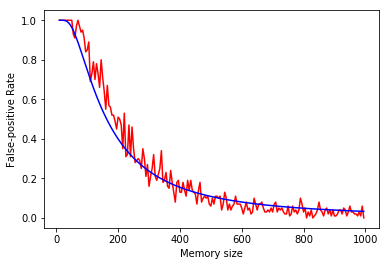

In [8]:
#Plotting theoretical vs. empirical false-positive rate as a function of memory size

import matplotlib.pyplot as plt

plt.plot(memory_size, emp_fp_rate, color = 'red')
plt.plot(memory_size, theo_fp_rate, color = 'blue')

plt.xlabel("Memory size")
plt.ylabel("False-positive Rate")
plt.show()

As seen in the graph above, the empirical and the theoretical results match up quite closely. Obviously with the simulation/empirical approach, there will be some inherent random noise, but the overall trend closely fit around the theoretical curve. The graph supports that the algorithm is correctly implemented. 

### Task 5: 
*Enumerate (if any) corner cases that one might find in CBFs.*

### <center> Appendix A: HC Applications </center>

#audience: (general audience -> non-technical jargon and friendly explanation

#dataviz: (task 4)

#algorithms:

#variables: 

#probability

#optimization

#simulation (theoretical vs. simulation)

### <center> References </center>

https://en.wikipedia.org/wiki/Bloom_filter#Counting_filters

Cormen

In [11]:
  <head><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"XAMPUFZVGwYHVlJWAgA="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(16),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error",function(t){r(t.stack)}),s.dev&&i.on("fn-err",function(t,n,e){r(e.stack)}),s.dev&&(r("NR AGENT IN DEVELOPMENT MODE"),r("flags: "+a(s,function(t,n){return t}).join(", ")))},{}],2:[function(t,n,e){function r(t,n,e,r,s){try{p?p-=1:o(s||new UncaughtException(t,n,e),!0)}catch(f){try{i("ierr",[f,c.now(),!0])}catch(d){}}return"function"==typeof u&&u.apply(this,a(arguments))}function UncaughtException(t,n,e){this.message=t||"Uncaught error with no additional information",this.sourceURL=n,this.line=e}function o(t,n){var e=n?null:c.now();i("err",[t,e])}var i=t("handle"),a=t(17),s=t("ee"),c=t("loader"),f=t("gos"),u=window.onerror,d=!1,l="nr@seenError",p=0;c.features.err=!0,t(1),window.onerror=r;try{throw new Error}catch(h){"stack"in h&&(t(8),t(7),"addEventListener"in window&&t(5),c.xhrWrappable&&t(9),d=!0)}s.on("fn-start",function(t,n,e){d&&(p+=1)}),s.on("fn-err",function(t,n,e){d&&!e[l]&&(f(e,l,function(){return!0}),this.thrown=!0,o(e))}),s.on("fn-end",function(){d&&!this.thrown&&p>0&&(p-=1)}),s.on("internal-error",function(t){i("ierr",[t,c.now(),!0])})},{}],3:[function(t,n,e){t("loader").features.ins=!0},{}],4:[function(t,n,e){function r(t){}if(window.performance&&window.performance.timing&&window.performance.getEntriesByType){var o=t("ee"),i=t("handle"),a=t(8),s=t(7),c="learResourceTimings",f="addEventListener",u="resourcetimingbufferfull",d="bstResource",l="resource",p="-start",h="-end",m="fn"+p,v="fn"+h,w="bstTimer",y="pushState",g=t("loader");g.features.stn=!0,t(6);var b=NREUM.o.EV;o.on(m,function(t,n){var e=t[0];e instanceof b&&(this.bstStart=g.now())}),o.on(v,function(t,n){var e=t[0];e instanceof b&&i("bst",[e,n,this.bstStart,g.now()])}),a.on(m,function(t,n,e){this.bstStart=g.now(),this.bstType=e}),a.on(v,function(t,n){i(w,[n,this.bstStart,g.now(),this.bstType])}),s.on(m,function(){this.bstStart=g.now()}),s.on(v,function(t,n){i(w,[n,this.bstStart,g.now(),"requestAnimationFrame"])}),o.on(y+p,function(t){this.time=g.now(),this.startPath=location.pathname+location.hash}),o.on(y+h,function(t){i("bstHist",[location.pathname+location.hash,this.startPath,this.time])}),f in window.performance&&(window.performance["c"+c]?window.performance[f](u,function(t){i(d,[window.performance.getEntriesByType(l)]),window.performance["c"+c]()},!1):window.performance[f]("webkit"+u,function(t){i(d,[window.performance.getEntriesByType(l)]),window.performance["webkitC"+c]()},!1)),document[f]("scroll",r,{passive:!0}),document[f]("keypress",r,!1),document[f]("click",r,!1)}},{}],5:[function(t,n,e){function r(t){for(var n=t;n&&!n.hasOwnProperty(u);)n=Object.getPrototypeOf(n);n&&o(n)}function o(t){s.inPlace(t,[u,d],"-",i)}function i(t,n){return t[1]}var a=t("ee").get("events"),s=t(19)(a,!0),c=t("gos"),f=XMLHttpRequest,u="addEventListener",d="removeEventListener";n.exports=a,"getPrototypeOf"in Object?(r(document),r(window),r(f.prototype)):f.prototype.hasOwnProperty(u)&&(o(window),o(f.prototype)),a.on(u+"-start",function(t,n){var e=t[1],r=c(e,"nr@wrapped",function(){function t(){if("function"==typeof e.handleEvent)return e.handleEvent.apply(e,arguments)}var n={object:t,"function":e}[typeof e];return n?s(n,"fn-",null,n.name||"anonymous"):e});this.wrapped=t[1]=r}),a.on(d+"-start",function(t){t[1]=this.wrapped||t[1]})},{}],6:[function(t,n,e){var r=t("ee").get("history"),o=t(19)(r);n.exports=r,o.inPlace(window.history,["pushState","replaceState"],"-")},{}],7:[function(t,n,e){var r=t("ee").get("raf"),o=t(19)(r),i="equestAnimationFrame";n.exports=r,o.inPlace(window,["r"+i,"mozR"+i,"webkitR"+i,"msR"+i],"raf-"),r.on("raf-start",function(t){t[0]=o(t[0],"fn-")})},{}],8:[function(t,n,e){function r(t,n,e){t[0]=a(t[0],"fn-",null,e)}function o(t,n,e){this.method=e,this.timerDuration=isNaN(t[1])?0:+t[1],t[0]=a(t[0],"fn-",this,e)}var i=t("ee").get("timer"),a=t(19)(i),s="setTimeout",c="setInterval",f="clearTimeout",u="-start",d="-";n.exports=i,a.inPlace(window,[s,"setImmediate"],s+d),a.inPlace(window,[c],c+d),a.inPlace(window,[f,"clearImmediate"],f+d),i.on(c+u,r),i.on(s+u,o)},{}],9:[function(t,n,e){function r(t,n){d.inPlace(n,["onreadystatechange"],"fn-",s)}function o(){var t=this,n=u.context(t);t.readyState>3&&!n.resolved&&(n.resolved=!0,u.emit("xhr-resolved",[],t)),d.inPlace(t,y,"fn-",s)}function i(t){g.push(t),h&&(x?x.then(a):v?v(a):(E=-E,O.data=E))}function a(){for(var t=0;t<g.length;t++)r([],g[t]);g.length&&(g=[])}function s(t,n){return n}function c(t,n){for(var e in t)n[e]=t[e];return n}t(5);var f=t("ee"),u=f.get("xhr"),d=t(19)(u),l=NREUM.o,p=l.XHR,h=l.MO,m=l.PR,v=l.SI,w="readystatechange",y=["onload","onerror","onabort","onloadstart","onloadend","onprogress","ontimeout"],g=[];n.exports=u;var b=window.XMLHttpRequest=function(t){var n=new p(t);try{u.emit("new-xhr",[n],n),n.addEventListener(w,o,!1)}catch(e){try{u.emit("internal-error",[e])}catch(r){}}return n};if(c(p,b),b.prototype=p.prototype,d.inPlace(b.prototype,["open","send"],"-xhr-",s),u.on("send-xhr-start",function(t,n){r(t,n),i(n)}),u.on("open-xhr-start",r),h){var x=m&&m.resolve();if(!v&&!m){var E=1,O=document.createTextNode(E);new h(a).observe(O,{characterData:!0})}}else f.on("fn-end",function(t){t[0]&&t[0].type===w||a()})},{}],10:[function(t,n,e){function r(t){var n=this.params,e=this.metrics;if(!this.ended){this.ended=!0;for(var r=0;r<d;r++)t.removeEventListener(u[r],this.listener,!1);if(!n.aborted){if(e.duration=a.now()-this.startTime,4===t.readyState){n.status=t.status;var i=o(t,this.lastSize);if(i&&(e.rxSize=i),this.sameOrigin){var c=t.getResponseHeader("X-NewRelic-App-Data");c&&(n.cat=c.split(", ").pop())}}else n.status=0;e.cbTime=this.cbTime,f.emit("xhr-done",[t],t),s("xhr",[n,e,this.startTime])}}}function o(t,n){var e=t.responseType;if("json"===e&&null!==n)return n;var r="arraybuffer"===e||"blob"===e||"json"===e?t.response:t.responseText;return h(r)}function i(t,n){var e=c(n),r=t.params;r.host=e.hostname+":"+e.port,r.pathname=e.pathname,t.sameOrigin=e.sameOrigin}var a=t("loader");if(a.xhrWrappable){var s=t("handle"),c=t(11),f=t("ee"),u=["load","error","abort","timeout"],d=u.length,l=t("id"),p=t(14),h=t(13),m=window.XMLHttpRequest;a.features.xhr=!0,t(9),f.on("new-xhr",function(t){var n=this;n.totalCbs=0,n.called=0,n.cbTime=0,n.end=r,n.ended=!1,n.xhrGuids={},n.lastSize=null,p&&(p>34||p<10)||window.opera||t.addEventListener("progress",function(t){n.lastSize=t.loaded},!1)}),f.on("open-xhr-start",function(t){this.params={method:t[0]},i(this,t[1]),this.metrics={}}),f.on("open-xhr-end",function(t,n){"loader_config"in NREUM&&"xpid"in NREUM.loader_config&&this.sameOrigin&&n.setRequestHeader("X-NewRelic-ID",NREUM.loader_config.xpid)}),f.on("send-xhr-start",function(t,n){var e=this.metrics,r=t[0],o=this;if(e&&r){var i=h(r);i&&(e.txSize=i)}this.startTime=a.now(),this.listener=function(t){try{"abort"===t.type&&(o.params.aborted=!0),("load"!==t.type||o.called===o.totalCbs&&(o.onloadCalled||"function"!=typeof n.onload))&&o.end(n)}catch(e){try{f.emit("internal-error",[e])}catch(r){}}};for(var s=0;s<d;s++)n.addEventListener(u[s],this.listener,!1)}),f.on("xhr-cb-time",function(t,n,e){this.cbTime+=t,n?this.onloadCalled=!0:this.called+=1,this.called!==this.totalCbs||!this.onloadCalled&&"function"==typeof e.onload||this.end(e)}),f.on("xhr-load-added",function(t,n){var e=""+l(t)+!!n;this.xhrGuids&&!this.xhrGuids[e]&&(this.xhrGuids[e]=!0,this.totalCbs+=1)}),f.on("xhr-load-removed",function(t,n){var e=""+l(t)+!!n;this.xhrGuids&&this.xhrGuids[e]&&(delete this.xhrGuids[e],this.totalCbs-=1)}),f.on("addEventListener-end",function(t,n){n instanceof m&&"load"===t[0]&&f.emit("xhr-load-added",[t[1],t[2]],n)}),f.on("removeEventListener-end",function(t,n){n instanceof m&&"load"===t[0]&&f.emit("xhr-load-removed",[t[1],t[2]],n)}),f.on("fn-start",function(t,n,e){n instanceof m&&("onload"===e&&(this.onload=!0),("load"===(t[0]&&t[0].type)||this.onload)&&(this.xhrCbStart=a.now()))}),f.on("fn-end",function(t,n){this.xhrCbStart&&f.emit("xhr-cb-time",[a.now()-this.xhrCbStart,this.onload,n],n)})}},{}],11:[function(t,n,e){n.exports=function(t){var n=document.createElement("a"),e=window.location,r={};n.href=t,r.port=n.port;var o=n.href.split("://");!r.port&&o[1]&&(r.port=o[1].split("/")[0].split("@").pop().split(":")[1]),r.port&&"0"!==r.port||(r.port="https"===o[0]?"443":"80"),r.hostname=n.hostname||e.hostname,r.pathname=n.pathname,r.protocol=o[0],"/"!==r.pathname.charAt(0)&&(r.pathname="/"+r.pathname);var i=!n.protocol||":"===n.protocol||n.protocol===e.protocol,a=n.hostname===document.domain&&n.port===e.port;return r.sameOrigin=i&&(!n.hostname||a),r}},{}],12:[function(t,n,e){function r(){}function o(t,n,e){return function(){return i(t,[f.now()].concat(s(arguments)),n?null:this,e),n?void 0:this}}var i=t("handle"),a=t(16),s=t(17),c=t("ee").get("tracer"),f=t("loader"),u=NREUM;"undefined"==typeof window.newrelic&&(newrelic=u);var d=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace","inlineHit","addRelease"],l="api-",p=l+"ixn-";a(d,function(t,n){u[n]=o(l+n,!0,"api")}),u.addPageAction=o(l+"addPageAction",!0),u.setCurrentRouteName=o(l+"routeName",!0),n.exports=newrelic,u.interaction=function(){return(new r).get()};var h=r.prototype={createTracer:function(t,n){var e={},r=this,o="function"==typeof n;return i(p+"tracer",[f.now(),t,e],r),function(){if(c.emit((o?"":"no-")+"fn-start",[f.now(),r,o],e),o)try{return n.apply(this,arguments)}catch(t){throw c.emit("fn-err",[arguments,this,t],e),t}finally{c.emit("fn-end",[f.now()],e)}}}};a("actionText,setName,setAttribute,save,ignore,onEnd,getContext,end,get".split(","),function(t,n){h[n]=o(p+n)}),newrelic.noticeError=function(t,n){"string"==typeof t&&(t=new Error(t)),i("err",[t,f.now(),!1,n])}},{}],13:[function(t,n,e){n.exports=function(t){if("string"==typeof t&&t.length)return t.length;if("object"==typeof t){if("undefined"!=typeof ArrayBuffer&&t instanceof ArrayBuffer&&t.byteLength)return t.byteLength;if("undefined"!=typeof Blob&&t instanceof Blob&&t.size)return t.size;if(!("undefined"!=typeof FormData&&t instanceof FormData))try{return JSON.stringify(t).length}catch(n){return}}}},{}],14:[function(t,n,e){var r=0,o=navigator.userAgent.match(/Firefox[\/\s](\d+\.\d+)/);o&&(r=+o[1]),n.exports=r},{}],15:[function(t,n,e){function r(t,n){if(!o)return!1;if(t!==o)return!1;if(!n)return!0;if(!i)return!1;for(var e=i.split("."),r=n.split("."),a=0;a<r.length;a++)if(r[a]!==e[a])return!1;return!0}var o=null,i=null,a=/Version\/(\S+)\s+Safari/;if(navigator.userAgent){var s=navigator.userAgent,c=s.match(a);c&&s.indexOf("Chrome")===-1&&s.indexOf("Chromium")===-1&&(o="Safari",i=c[1])}n.exports={agent:o,version:i,match:r}},{}],16:[function(t,n,e){function r(t,n){var e=[],r="",i=0;for(r in t)o.call(t,r)&&(e[i]=n(r,t[r]),i+=1);return e}var o=Object.prototype.hasOwnProperty;n.exports=r},{}],17:[function(t,n,e){function r(t,n,e){n||(n=0),"undefined"==typeof e&&(e=t?t.length:0);for(var r=-1,o=e-n||0,i=Array(o<0?0:o);++r<o;)i[r]=t[n+r];return i}n.exports=r},{}],18:[function(t,n,e){n.exports={exists:"undefined"!=typeof window.performance&&window.performance.timing&&"undefined"!=typeof window.performance.timing.navigationStart}},{}],19:[function(t,n,e){function r(t){return!(t&&t instanceof Function&&t.apply&&!t[a])}var o=t("ee"),i=t(17),a="nr@original",s=Object.prototype.hasOwnProperty,c=!1;n.exports=function(t,n){function e(t,n,e,o){function nrWrapper(){var r,a,s,c;try{a=this,r=i(arguments),s="function"==typeof e?e(r,a):e||{}}catch(f){l([f,"",[r,a,o],s])}u(n+"start",[r,a,o],s);try{return c=t.apply(a,r)}catch(d){throw u(n+"err",[r,a,d],s),d}finally{u(n+"end",[r,a,c],s)}}return r(t)?t:(n||(n=""),nrWrapper[a]=t,d(t,nrWrapper),nrWrapper)}function f(t,n,o,i){o||(o="");var a,s,c,f="-"===o.charAt(0);for(c=0;c<n.length;c++)s=n[c],a=t[s],r(a)||(t[s]=e(a,f?s+o:o,i,s))}function u(e,r,o){if(!c||n){var i=c;c=!0;try{t.emit(e,r,o,n)}catch(a){l([a,e,r,o])}c=i}}function d(t,n){if(Object.defineProperty&&Object.keys)try{var e=Object.keys(t);return e.forEach(function(e){Object.defineProperty(n,e,{get:function(){return t[e]},set:function(n){return t[e]=n,n}})}),n}catch(r){l([r])}for(var o in t)s.call(t,o)&&(n[o]=t[o]);return n}function l(n){try{t.emit("internal-error",n)}catch(e){}}return t||(t=o),e.inPlace=f,e.flag=a,e}},{}],ee:[function(t,n,e){function r(){}function o(t){function n(t){return t&&t instanceof r?t:t?c(t,s,i):i()}function e(e,r,o,i){if(!l.aborted||i){t&&t(e,r,o);for(var a=n(o),s=m(e),c=s.length,f=0;f<c;f++)s[f].apply(a,r);var d=u[g[e]];return d&&d.push([b,e,r,a]),a}}function p(t,n){y[t]=m(t).concat(n)}function h(t,n){var e=y[t];if(e)for(var r=0;r<e.length;r++)e[r]===n&&e.splice(r,1)}function m(t){return y[t]||[]}function v(t){return d[t]=d[t]||o(e)}function w(t,n){f(t,function(t,e){n=n||"feature",g[e]=n,n in u||(u[n]=[])})}var y={},g={},b={on:p,addEventListener:p,removeEventListener:h,emit:e,get:v,listeners:m,context:n,buffer:w,abort:a,aborted:!1};return b}function i(){return new r}function a(){(u.api||u.feature)&&(l.aborted=!0,u=l.backlog={})}var s="nr@context",c=t("gos"),f=t(16),u={},d={},l=n.exports=o();l.backlog=u},{}],gos:[function(t,n,e){function r(t,n,e){if(o.call(t,n))return t[n];var r=e();if(Object.defineProperty&&Object.keys)try{return Object.defineProperty(t,n,{value:r,writable:!0,enumerable:!1}),r}catch(i){}return t[n]=r,r}var o=Object.prototype.hasOwnProperty;n.exports=r},{}],handle:[function(t,n,e){function r(t,n,e,r){o.buffer([t],r),o.emit(t,n,e)}var o=t("ee").get("handle");n.exports=r,r.ee=o},{}],id:[function(t,n,e){function r(t){var n=typeof t;return!t||"object"!==n&&"function"!==n?-1:t===window?0:a(t,i,function(){return o++})}var o=1,i="nr@id",a=t("gos");n.exports=r},{}],loader:[function(t,n,e){function r(){if(!E++){var t=x.info=NREUM.info,n=p.getElementsByTagName("script")[0];if(setTimeout(u.abort,3e4),!(t&&t.licenseKey&&t.applicationID&&n))return u.abort();f(g,function(n,e){t[n]||(t[n]=e)}),c("mark",["onload",a()+x.offset],null,"api");var e=p.createElement("script");e.src="https://"+t.agent,n.parentNode.insertBefore(e,n)}}function o(){"complete"===p.readyState&&i()}function i(){c("mark",["domContent",a()+x.offset],null,"api")}function a(){return O.exists&&performance.now?Math.round(performance.now()):(s=Math.max((new Date).getTime(),s))-x.offset}var s=(new Date).getTime(),c=t("handle"),f=t(16),u=t("ee"),d=t(15),l=window,p=l.document,h="addEventListener",m="attachEvent",v=l.XMLHttpRequest,w=v&&v.prototype;NREUM.o={ST:setTimeout,SI:l.setImmediate,CT:clearTimeout,XHR:v,REQ:l.Request,EV:l.Event,PR:l.Promise,MO:l.MutationObserver};var y=""+location,g={beacon:"bam.nr-data.net",errorBeacon:"bam.nr-data.net",agent:"js-agent.newrelic.com/nr-1118.min.js"},b=v&&w&&w[h]&&!/CriOS/.test(navigator.userAgent),x=n.exports={offset:s,now:a,origin:y,features:{},xhrWrappable:b,userAgent:d};t(12),p[h]?(p[h]("DOMContentLoaded",i,!1),l[h]("load",r,!1)):(p[m]("onreadystatechange",o),l[m]("onload",r)),c("mark",["firstbyte",s],null,"api");var E=0,O=t(18)},{}]},{},["loader",2,10,4,3]);</script><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","queueTime":1,"licenseKey":"42086d9a90","agent":"","transactionName":"YgRRYkoADBVTWxYPVltOdUNWAhYPXVZNFVxYCF1XSk8BCVxMEAlVWQRBRRYVBwtCVAMSXEZbd1NeABcKRm4LA04bBlZC","applicationID":"5723451","errorBeacon":"bam.nr-data.net","applicationTime":43}</script>


SyntaxError: invalid syntax (<ipython-input-11-fcb3acb84b85>, line 1)

Bloom filter look-up time:
0
Word-by-word look-up time:
0


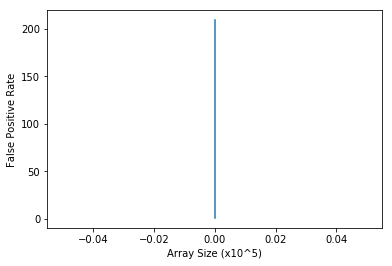

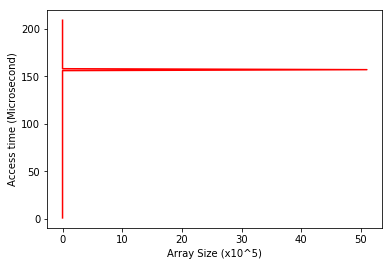

In [19]:
import mmh3
import bitarray
import datetime
import random
import matplotlib.pyplot as plt


def rand_word(): # function to generate a random lower case string of size 5 to 10
    return ''.join(random.choice(string.ascii_lowercase) for i in range(random.randint(5,10)))
###Setting up the Bloom Filter with hash functions
class BloomFilter:
# 2 input variables: size, number of times to run the hash function
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray.bitarray(size)
        self.bit_array.setall(0)

    def add(self, string):
    #This runs the hash funtion and set the bit array to 1
        for seed in range(self.hash_count):
            result = mmh3.hash(string, seed) % self.size
            self.bit_array[result] = 1

    def lookup(self, string):
        for seed in range(self.hash_count):
            result = mmh3.hash(string, seed) % self.size
            if self.bit_array[result] == 0:
                return "No."
        return "Probably."

###TESTING THE CODE
bf = BloomFilter(1000000, 7)
wlist = []

#adding a list of English words
lines = [rand_word() for _ in range(100)]
for line in lines:
    bf.add(line)
    wlist.append(line)

#Testing the code and comparing the time difference
start = datetime.datetime.now()
bf.lookup("python")
finish = datetime.datetime.now()
print ("Bloom filter look-up time:")
print ((finish-start).microseconds)

start = datetime.datetime.now()
for word in wlist:
    if word == "python":
        break
finish = datetime.datetime.now()
print ("Word-by-word look-up time:")
print ((finish-start).microseconds)


###EMPIRICALLY GENERATING THE GRAPHS
fp_list = []
at_list = []
for m in range(1,210):
    bf = BloomFilter(m * 100000, 7)
    wlist = []

    #adding a list of English words
    lines = [rand_word() for _ in range (100)]
    for line in lines:
        bf.add(line)
        wlist.append(line)

    #recording access time
    start = datetime.datetime.now()
    bf.lookup("python")
    finish = datetime.datetime.now()
    access_time = (finish-start).microseconds
    at_list.append(access_time)

    #Testing for false positive rates with non-English words
    fp = 0
    for i in range(10000):
        q = random.randint(1,10)
        nonword = "".join(random.choice('abcdefghigklmnopqrstuvwxyz') for _ in range(q))
        if bf.lookup(nonword) == "Probably.":
            fp = fp + 1
    fp_list.append(float(fp)/float(10000))


###TO PLOT THE GRAPHS
plt.plot(fp_list, range(1,210))
plt.ylabel("False Positive Rate")
plt.xlabel("Array Size (x10^5)")
plt.show()

plt.plot(at_list, range(1,210),"red")
plt.ylabel("Access time (Microsecond)")
plt.xlabel("Array Size (x10^5)")
plt.show()

###CREDIT TO MAX BURSTEIN'S BLOG POST: http://www.maxburstein.com/blog/creating-a-simple-bloom-filter/